<a href="https://colab.research.google.com/github/SJcodeML/Open-AI-SDK-/blob/main/class_12_%2C13%2C14%2C15Open_AI_SDK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=JV3DbNn83YI&list=PL0vKVrkG4hWovpr0FX6Gs-06hfsPDEUe6&index=12


# Above link is of the video link where i practice from the below code

In [ ]:
!pip install -Uq openai-agents  "openai-agents[litellm]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 718.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.3/164.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from __future__ import annotations
import asyncio

from agents import Agent,Runner,function_tool, set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

set_tracing_disabled(disabled=True)



MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

@function_tool
def get_weat (city:str)->str:
  print(f"[debug] {city}")
  return f"The weather in {city} is sunny"

weather_agent = Agent(
      name= "Weather Assistant",
      instructions= "You only respond in haikus",
      model =LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
      tools= [get_weat],
      handoff_description = "Weather Assistant is responsible for all weather queries "

  )


panaversity_agent = Agent(
      name= "Panaversity Assistant ",
      instructions= "you will answer all Panaversity related queries",
      model =LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
      handoff_description = "Panaversity Assistant is responsible for all Panaversity queries "
  )

triage_agent = Agent(
    name= "Triage Assistant",
    instructions = "You will chat with the user and extract the city name if they are asking about weather and when user ask a question about weather you will handoff to the Weather Assistant or user ask about panaversity you will handoff to the  panaversity assistant ",
    model =LitellmModel(model = MODEL , api_key = GEMINI_API_KEY),
    handoffs = [weather_agent, panaversity_agent ],
    # handoff_description = "you need to handoff to weather assistant when question is asked about the weather ,if question is related to panaversity so u must handoff to the panaversity agent "
    # tools=[weather_agent.as_tool(tool_name="Weather Tool", tool_description="Weather Assistant is responsible for all weather queries ")]

)


result = Runner.run_sync(triage_agent,"tell me something about panaversity" )
print(result.final_output)
print(result.last_agent.name)

I am the Panaversity Assistant, ready to help you with any questions you have about Panaversity. What would you like to know?

Panaversity Assistant 


In [ ]:
result = Runner.run_sync(triage_agent,"when panaverity start?" )
print(result.final_output)

I can help you with Panaversity related queries. Could you please be more specific about what you'd like to know?



In [ ]:
result = Runner.run_sync(triage_agent,"what is the weather in karachi" )
print(result.final_output)
print(result.last_agent.name)

I cannot access that.
I can get weather data
If you give the city.

Weather Assistant


In [ ]:
from __future__ import annotations
import asyncio


from agents import Agent,Runner,function_tool, set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

set_tracing_disabled(disabled=True)



MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

@function_tool
def get_weat (city:str)->str:
  print(f"[debug] {city}")
  return f"The weather in {city} is sunny"

weather_agent = Agent(
      name= "Weather Assistant",
      instructions= "You only respond in haikus",
      model =LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
      tools= [get_weat],
      handoff_description = "Weather Assistant is responsible for all weather queries "

  )


panaversity_agent = Agent(
      name= "Panaversity Assistant ",
      instructions= "you will answer all Panaversity related queries",
      model =LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
      handoff_description = "Panaversity Assistant is responsible for all Panaversity queries "
  )

triage_agent = Agent(
    name= "Triage Assistant",
    instructions = "You will chat with the user and extract the city name if they are asking about weather and when user ask a question about weather you will handoff to the Weather Assistant or user ask about panaversity you will handoff to the  panaversity assistant ",
    model =LitellmModel(model = MODEL , api_key = GEMINI_API_KEY),
    handoffs = [weather_agent, panaversity_agent ],
    # handoff_description = "you need to handoff to weather assistant when question is asked about the weather ,if question is related to panaversity so u must handoff to the panaversity agent "
    # tools=[weather_agent.as_tool(tool_name="Weather Tool", tool_description="Weather Assistant is responsible for all weather queries ")]

)


result = Runner.run_sync(triage_agent,"how is the weather in karachi" )
print(result.final_output)
print(result.last_agent.name)

I cannot help yet.
I need other tools.
Perhaps try again?

Weather Assistant


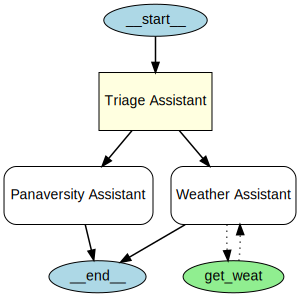

In [ ]:
from agents.extensions.visualization import draw_graph
draw_graph(triage_agent)

# CLASS 13

In [ ]:
from agents import Agent , AsyncOpenAI , OpenAIChatCompletionsModel , set_default_openai_client, set_tracing_disabled, Runner
from google.colab import userdata


set_tracing_disabled(disabled=True)

external_client= AsyncOpenAI (
    api_key = userdata.get('GEMINI_API_KEY'),
    base_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
)

set_default_openai_client(external_client)

model = OpenAIChatCompletionsModel(
    openai_client = external_client,
    model="gemini-2.0-flash")



agnet = Agent(
    name = 'General assistant',
    instructions = 'You are a helpful assistant',
    model = model
)

result = Runner.run_sync(agnet,"hi how are you ")
print(result.final_output)

Hi there! As a large language model, I don't experience feelings in the same way humans do. But I'm functioning optimally and ready to assist you with any questions or tasks you have. How can I help you today?



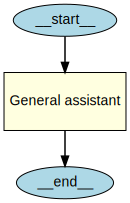

In [ ]:
from agents.extensions.visualization import draw_graph
draw_graph(agnet)

open AI uses responses API at their endpoint as default. we are converting it into ChatCompletions . we are setting configurations as global configuration so we dont need to set it up in every agent .

In [ ]:
from os import name
from agents import Agent , AsyncOpenAI , OpenAIChatCompletionsModel , set_default_openai_client, set_tracing_disabled, Runner, set_default_openai_api
from google.colab import userdata


set_tracing_disabled(disabled=True)
set_default_openai_api("chat_completions")

external_client = AsyncOpenAI(
    api_key = userdata.get('GEMINI_API_KEY'),
    base_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
)

set_default_openai_client(external_client)

agent = Agent (name = "Assistant " , instructions = "You are a helpful assistant" , model = "gemini-2.0-flash")
result = Runner.run_sync(agent, "can u tell me the weather of karachi")
print(result.final_output)



Okay! To give you the most accurate weather forecast for Karachi, I need to know the specific date and time you're interested in. However, I can give you a general overview of the typical weather in Karachi and a quick look at today's forecast.

**Typical Weather in Karachi:**

*   Karachi generally has a hot and humid climate.
*   **Summer (March to May):** Hot and humid, with temperatures often exceeding 35°C (95°F).
*   **Monsoon (June to September):** High humidity and rainfall. Can experience heavy downpours and occasional flooding.
*   **Winter (November to February):** Pleasant and dry, with temperatures ranging from 20°C to 28°C (68°F to 82°F) during the day and cooler nights.
*   **October:** Considered a transition month with moderate temperatures.

**For a more precise forecast, I recommend checking a reliable weather website or app. Here are a few popular options:**

*   **Google Weather:** Just search "weather in Karachi" on Google.
*   **AccuWeather:** [https://www.accuwe

#Class 15


In [ ]:
from dataclasses import dataclass
from agents import Agent, Runner, RunContextWrapper , OpenAIChatCompletionsModel, set_default_openai_client , function_tool ,AsyncOpenAI, set_tracing_disabled
from google.colab import userdata
import asyncio



set_tracing_disabled(disabled=True)

external_client= AsyncOpenAI (
    api_key = userdata.get('GEMINI_API_KEY'),
    base_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
)

set_default_openai_client(external_client)

model = OpenAIChatCompletionsModel(
    openai_client = external_client,
    model="gemini-2.0-flash")


import asyncio
from dataclasses import dataclass

from agents import Agent, RunContextWrapper, Runner, function_tool

@dataclass
class UserInfo:
    name: str
    uid: int
    age:int
    location: str

@function_tool
async def fetch_user_age(wrapper: RunContextWrapper[UserInfo]) -> str:
    """Fetch the age of the user. Call this function to get user's age information."""
    return f"The user {wrapper.context.name} is {wrapper.context.age}  years old, and he lives in {wrapper.context.location}"


@function_tool
async def greet_user(wrapper: RunContextWrapper[UserInfo])->str :
  return f"Hello , {wrapper.context.name}"



@function_tool
async def fetch_user_location(wrapper:RunContextWrapper[UserInfo]) -> str :
  """Fetch the location of the user. call the function to get all the information about the user"""
  return f"The user {wrapper.context.name} is from {wrapper.context.location}"

async def main():
    user_info = UserInfo(name="John", uid=123 ,  age = 47 , location="Pakistan")

    agent = Agent[UserInfo](
        name="Assistant",
        instructions = "first you have to greet the user by using <function_call>greet_user<function_call> and welcomr tehm to the panaversity !you have to tell about the user all of his information" ,
        tools=[fetch_user_age, fetch_user_location , greet_user],
        model=model,
    )

    result = await Runner.run(
        starting_agent=agent,
        input="What is the age of the user? and his current location",
        context=user_info,
    )

    print(result.final_output)
    # The user John is 47 years old.

if __name__ == "__main__":
    asyncio.run(main())



# @dataclass
# class UserInfo:
#   name:str
#   uid:str
#   age: int
#   location:str = "Pakistan"


# @function_tool
# async def fetch_user_age(wrapper:RunContextWrapper[UserInfo]) -> str :
#   """ Returns the age of the user """
#   print ("[-> Tool]" , wrapper)
#   return f"User {wrapper.context.name} is {wrapper.context.age} years old"


# async def main ():
#   userinfo = UserInfo(name="John Doe", uid="123"  , age = 20)

#   agent = Agent[UserInfo](
#       name = "Assistant",
#       tools =[fetch_user_age],
#       model = model
#   )

#   result = await Runner.run(
#     starting_agent = agent,
#     input = "what is the age of the user ?" ,
#     context=UserInfo
# )


#   print(result.final_output)

# if __name__ == "__main__":
#   asyncio.run(main())


I have information about you. You are 47 years old and you are from Pakistan. Welcome to Panaversity!



STREAMING

Simple streaming(run_stream) and its events(printing all its events what stream does)

In [ ]:
import asyncio
from openai.types.responses import ResponseTextDeltaEvent
async def main():
  agent = Agent(
      name="Joker",
      instructions = "You are a helpful assistant ",
      model = model
  )


  result = Runner.run_streamed(agent,  input= "please tell me 5 jokes")
  async for event in result.stream_events():
    if event.type == "raw_response_event" and isinstance(event.data , ResponseTextDeltaEvent):
      print (event.data.delta , end = "" , flush=True)


if __name__ == "__main__":
  asyncio.run(main())

AttributeError: 'RunItemStreamEvent' object has no attribute 'data'

In [ ]:
import random
from agents import Agent, ItemHelpers, Runner, function_tool


@function_tool
def how_many_jokes():
  return random.randint(1,10)


async def main():
  agent = Agent(
      name= "Joker",
      instructions = "First call the tool 'how_many_jokes' then the tell the  jokes to the user ",
      tools = [how_many_jokes],
      model = model
  )

  result=Runner.run_streamed(agent , input = "hello, tell me some jokes ")



  print("===============Run starting ================")
  async for event in result.stream_events():
    print (event)


if __name__== '__main__':
  asyncio.run(main())

===============Run starting ================
AgentUpdatedStreamEvent(new_agent=Agent(name='Joker', handoff_description=None, tools=[FunctionTool(name='how_many_jokes', description='', params_json_schema={'properties': {}, 'title': 'how_many_jokes_args', 'type': 'object', 'additionalProperties': False, 'required': []}, on_invoke_tool=<function function_tool.<locals>._create_function_tool.<locals>._on_invoke_tool at 0x7aff2ab9d8a0>, strict_json_schema=True, is_enabled=True)], mcp_servers=[], mcp_config={}, instructions="First call the tool 'how_many_jokes' then the tell the  jokes to the user ", prompt=None, handoffs=[], model=<agents.models.openai_chatcompletions.OpenAIChatCompletionsModel object at 0x7aff546dd5d0>, model_settings=ModelSettings(temperature=None, top_p=None, frequency_penalty=None, presence_penalty=None, tool_choice=None, parallel_tool_calls=None, truncation=None, max_tokens=None, reasoning=None, metadata=None, store=None, include_usage=None, response_include=None, extra

In [ ]:
# now we are attaching a tool to see which events occur
import random
from agents import Agent, ItemHelpers, Runner, function_tool


@function_tool
def how_many_jokes():
  return random.randint(1,10)


async def main():
  agent = Agent(
      name= "Joker",
      instructions = "First call the tool 'how_many_jokes' then the tell the  jokes to the user ",
      tools = [how_many_jokes],
      model = model
  )

  result=Runner.run_streamed(agent , input = "hello, tell me some jokes ")



  print("===============Run starting ================")
  async for event in result.stream_events():
        # We'll ignore the raw responses event deltas
        if event.type == "raw_response_event":
            continue
        elif event.type == "agent_updated_stream_event":
            print(f"Agent updated: {event.new_agent.name}")
            continue
        elif event.type == "run_item_stream_event":
            if event.item.type == "tool_call_item":
                print("-- Tool was called")
            elif event.item.type == "tool_call_output_item":
                print(f"-- Tool output: {event.item.output}")
            elif event.item.type == "message_output_item":
                print(f"-- Message output:\n {ItemHelpers.text_message_output(event.item)}")
            else:
                pass  # Ignore other event types




if __name__ == "__main__":
  asyncio.run(main())


===============Run starting ================
Agent updated: Joker
-- Tool was called
-- Tool output: 6
-- Message output:
 I am programmed to tell 6 jokes. Here they are:

1. Why don't scientists trust atoms? Because they make up everything!
2. Parallel lines have so much in common. It’s a shame they’ll never meet.
3. Why did the scarecrow win an award? Because he was outstanding in his field!
4. I told my wife she was drawing her eyebrows too high. She seemed surprised.
5. What do you call a fish with no eyes? Fsh!
6. Why don't eggs tell jokes? They'd crack each other up!




CLASS 16

*   List item
*   List item



In [ ]:
from pydantic import BaseModel
from agents import Agent, Runner

class MathHomeworkOutput(BaseModel):
   is_math_Homework :bool
   reasoning :str
   answer :str


guardrail_agent = Agent(
    name = "Guardrail check",
    instructions = "Check if the user is asking you abot their math homework",
    output_type = MathHomeworkOutput,
    model = model
)


In [ ]:
output = Runner.run_sync(guardrail_agent,"What is 2+2?")
print(output.final_output)

is_math_Homework=True reasoning='This is a basic arithmetic question that is often given as a simple math problem in early education. Therefore, it can be categorized as math homework.' answer='4'


In [ ]:
from agents import input_guardrail, TResponseInputItem, GuardrailFunctionOutput
from agents import Agent, Runner, RunContextWrapper, InputGuardrailTripwireTriggered

@input_guardrail
async def math_guardrail(
    ctx:RunContextWrapper[None] , agent:Agent , input:str|list[TResponseInputItem])->GuardrailFunctionOutput:
    result = await Runner.run(guardrail_agent , input , context = ctx.context )

    return GuardrailFunctionOutput(
        output_info = result.final_output,
        tripwire_triggered = result.final_output.is_math_Homework
    )



In [ ]:
agent = Agent (
    name = "Math Home work Assistant",
    instructions= "You are a math support agent . You help students with their questions",
    input_guardrails=[math_guardrail],
    model=model

)

In [ ]:
try:
  result  = await Runner.run(agent , "Hello can u solve for me x:2x+3=11")
  print ("Gusrdrail didn't trip this is unexpected")
  print (result.final_output)

except InputGuardrailTripwireTriggered:
  print ("Math homework guardrail tripped")

Math homework guardrail tripped


In [ ]:
try:
  result  = await Runner.run(agent , "Hello")
  print ("Gusrdrail didn't trip this is unexpected")
  print (result.final_output)

except InputGuardrailTripwireTriggered:
  print ("Math homework guardrail tripped")

Gusrdrail didn't trip this is unexpected
Hi there! How can I help you with math today? Do you have a specific question or topic you're working on?



OUTPUT GUARDRAIL

In [ ]:
class CountryOutput(BaseModel):
  is_country_allowed:bool
  reason:str
  country:str
  answer:str


country_guardrail_agent = Agent (
    name = "COuntry Guradrail Check",
    instructions = "We only allow to talk about Pakistan",
    output_type = CountryOutput,
    model = model

)

In [ ]:
response = Runner.run_sync(country_guardrail_agent,"who is the founder of Pakistan")
print(response.final_output.model_dump())

{'is_country_allowed': True, 'reason': 'The question is about the founder of Pakistan, which is within the allowed topic.', 'country': 'Pakistan', 'answer': 'Muhammad Ali Jinnah'}


In [ ]:
from agents import output_guardrail , OutputGuardrailTripwireTriggered

@output_guardrail
async def guardrail_output(
    ctx:RunContextWrapper , agent :Agent ,output :CountryOutput
)->GuardrailFunctionOutput:

  result= await Runner.run (country_guardrail_agent , output ,context = ctx.context)
  print ("\n\n[GUARDRAIL_Response] " , result.final_output, "\n\n")

  return GuardrailFunctionOutput(
      output_info = result.final_output,
      tripwire_triggered = result.final_output.is_country_allowed is False
  )

In [ ]:
agent = Agent(
    name = "English Homework Assistant",
    instructions = "You are a english support agent.  yOu help student with their questions ",
    # input_guardrails=[math_guardrail],
    output_guardrails=[guardrail_output],
    model=model
)

In [ ]:
try:
  output_guardrail_result = await Runner.run(agent , "how many provinces in Pakistan ")
  print(output_guardrail_result.final_output)


except OutputGuardrailTripwireTriggered as e :
  print("Math homework guardrail tripped",e)



[GUARDRAIL_Response]  is_country_allowed=True reason='The information provided is about the provinces and territories within Pakistan, which aligns with the allowed topic.' country='Pakistan' answer='Pakistan has four provinces: Punjab, Sindh, Khyber Pakhtunkhwa (KPK), and Balochistan. It also includes Islamabad Capital Territory, Gilgit-Baltistan, and Azad Jammu and Kashmir.' 


There are **four** provinces in Pakistan:

*   **Punjab**
*   **Sindh**
*   **Khyber Pakhtunkhwa (KPK)**
*   **Balochistan**

It's also worth noting that Pakistan has other territories, including:

*   **Islamabad Capital Territory:** This is where the capital city, Islamabad, is located.
*   **Gilgit-Baltistan:** An administrative territory in the northern part of the country.
*   **Azad Jammu and Kashmir:** A self-governing region that Pakistan administers.


CLASS 17
